In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe creation

In [17]:
df = pd.read_csv('results.csv')
df.head()

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,CPP/0,21.097517,474.683629,122.223978,255.036204,22.5,5.794222,2.080334,0.000052,2.457120e-06,0.006098
1,llama-2-7b.Q2_K,CPP/1,62.684144,1410.372684,344.120273,-17.513014,22.5,5.794222,2.316614,0.000106,1.686102e-06,0.006098
2,llama-2-7b.Q2_K,CPP/2,12.251260,275.645653,60.347804,-297.584238,22.5,5.794222,28.570369,0.000002,1.907662e-07,0.006098
3,llama-2-7b.Q2_K,CPP/3,61.631703,1386.691316,426.471526,-109.179087,22.5,5.794222,0.000000,0.000104,1.682318e-06,0.006098
4,llama-2-7b.Q2_K,CPP/4,26.387190,593.704117,143.322905,-112.553090,22.5,5.794222,31.300154,0.000038,1.440018e-06,0.006098


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        1640 non-null   object 
 1   Benchmark prompt           1640 non-null   object 
 2   Execution time (s)         1640 non-null   float64
 3   CPU Energy (J)             1640 non-null   float64
 4   RAM Energy (J)             1640 non-null   float64
 5   GPU Energy (J)             1640 non-null   float64
 6   CPU Power (W)              1640 non-null   float64
 7   RAM Power (W)              1640 non-null   float64
 8   GPU Power (W)              1640 non-null   float64
 9   CO2 emissions (Kg)         1640 non-null   float64
 10  CO2 emissions rate (Kg/s)  1640 non-null   float64
 11  HumanEval-X pass@1         1640 non-null   float64
dtypes: float64(10), object(2)
memory usage: 153.9+ KB


### Calculating mean values for all columns

In [19]:
# Extract keywords from "Benchmark prompt"
df['Programming Language'] = df['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df['Programming Language'].unique()

array(['CPP', 'Go', 'Java', 'JavaScript', 'Python'], dtype=object)

In [20]:
# Calculate the mean values for 'CPU Energy (J)' and 'HumanEval-X'
mean_values_df = df.groupby(['LLM', 'Programming Language']).agg(
    {
        'CPU Energy (J)': 'mean', 
        'Execution time (s)': 'mean', 
        'HumanEval-X pass@1': 'mean'
    }).reset_index()

# Rename the columns for clarity
mean_values_df.columns = ['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)', 'HumanEval-X pass@1']

mean_values_df


,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,CPP,1020.889521,45.373565,0.006098
1,llama-2-7b.Q2_K,Go,877.719733,39.010372,0.000000
2,llama-2-7b.Q2_K,Java,996.001759,44.267437,0.000000
3,llama-2-7b.Q2_K,JavaScript,913.766075,40.612448,0.024390
4,llama-2-7b.Q2_K,Python,867.922491,38.574927,0.054878
5,llama-2-7b.Q3_K_L,CPP,1193.717420,53.054938,0.006098
6,llama-2-7b.Q3_K_L,Go,995.296695,44.236097,0.000000
7,llama-2-7b.Q3_K_L,Java,1216.408511,54.063450,0.000000
8,llama-2-7b.Q3_K_L,JavaScript,1008.495768,44.822725,0.042683
9,llama-2-7b.Q3_K_L,Python,914.261064,40.634460,0.103659


In [21]:
# Custom colors for the hue
custom_palette = {
    'C++': 'blue', 
    'Go': 'orange', 
    'Java': 'green',
    'JavaScript': 'red', 
    'Python': 'purple'
}

# Custom colors for the hue
custom_palette_llms = {
    'llama-2-7b.Q2_K': 'blue', 
    'llama-2-7b.Q3_K_L': 'red'
}

In [22]:
# Update 'CPP' to 'C++' in the data frame
df['Programming Language'] = df['Programming Language'].replace('CPP', 'C++')
mean_values_df['Programming Language'] = mean_values_df['Programming Language'].replace('CPP', 'C++')

### Scatterplot por LLM

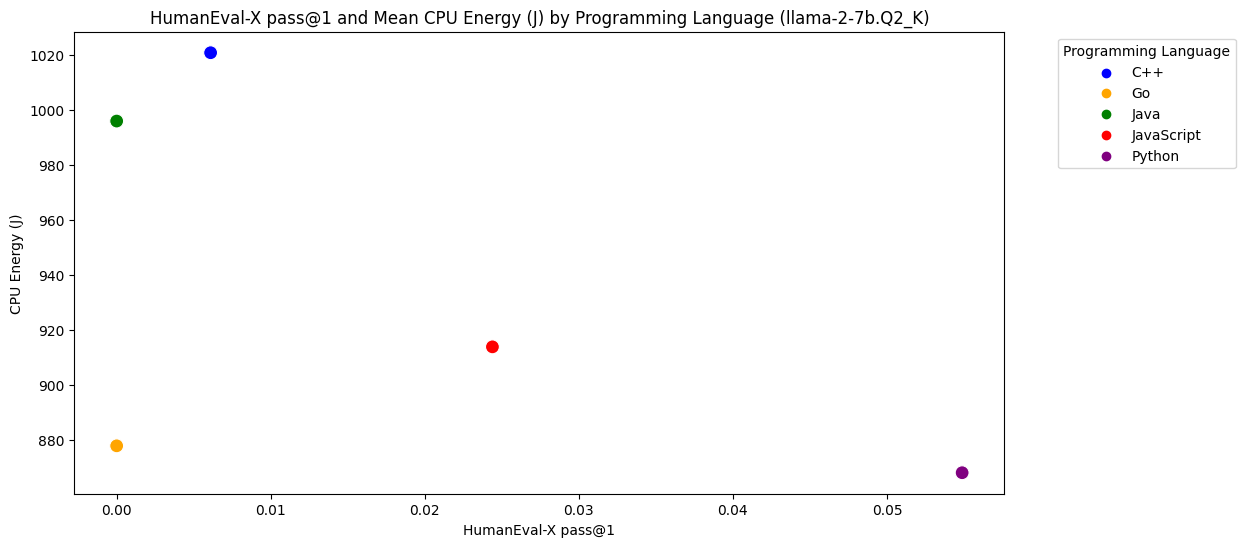

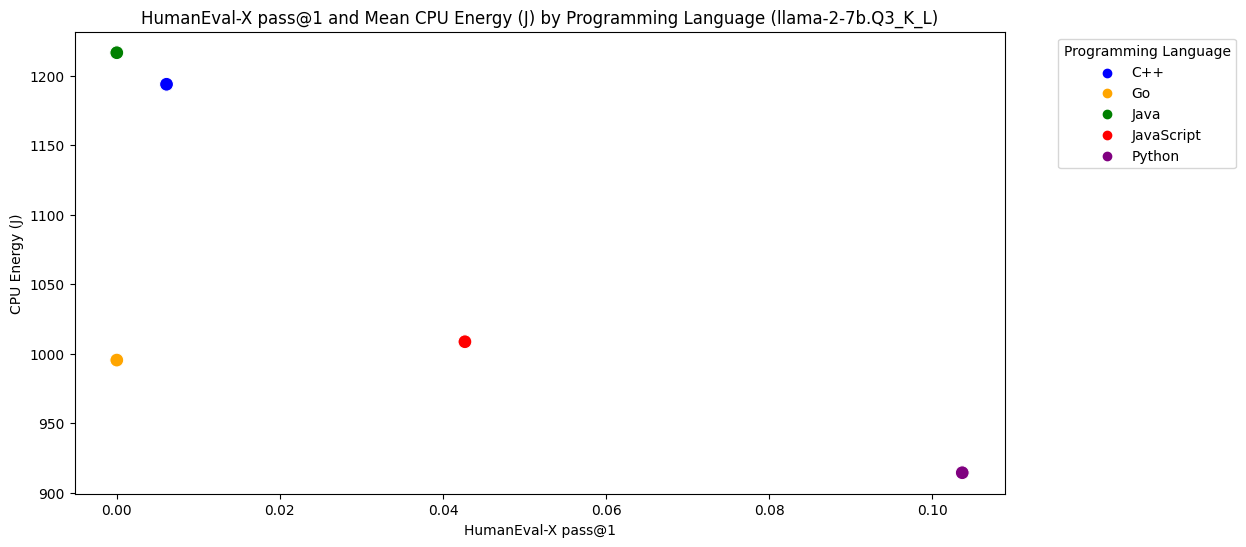

In [23]:
# Filter the DataFrame for the specific value in the "LLM" column
for model_name in ["llama-2-7b.Q2_K", "llama-2-7b.Q3_K_L"]:

    filtered_mean_values_df = mean_values_df[mean_values_df['LLM'] == model_name]
    
    # Create a scatter plot using seaborn
    plt.figure(figsize=(12, 6))
    scatter_plot = sns.scatterplot(x='HumanEval-X pass@1', y='CPU Energy (J)', hue='Programming Language', data=filtered_mean_values_df, palette=custom_palette, s=100)
    
    # Add labels and title
    plt.xlabel('HumanEval-X pass@1')
    plt.ylabel('CPU Energy (J)')
    plt.title(f'HumanEval-X pass@1 and Mean CPU Energy (J) by Programming Language ({model_name})')
    
    # Add legend
    scatter_plot.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()

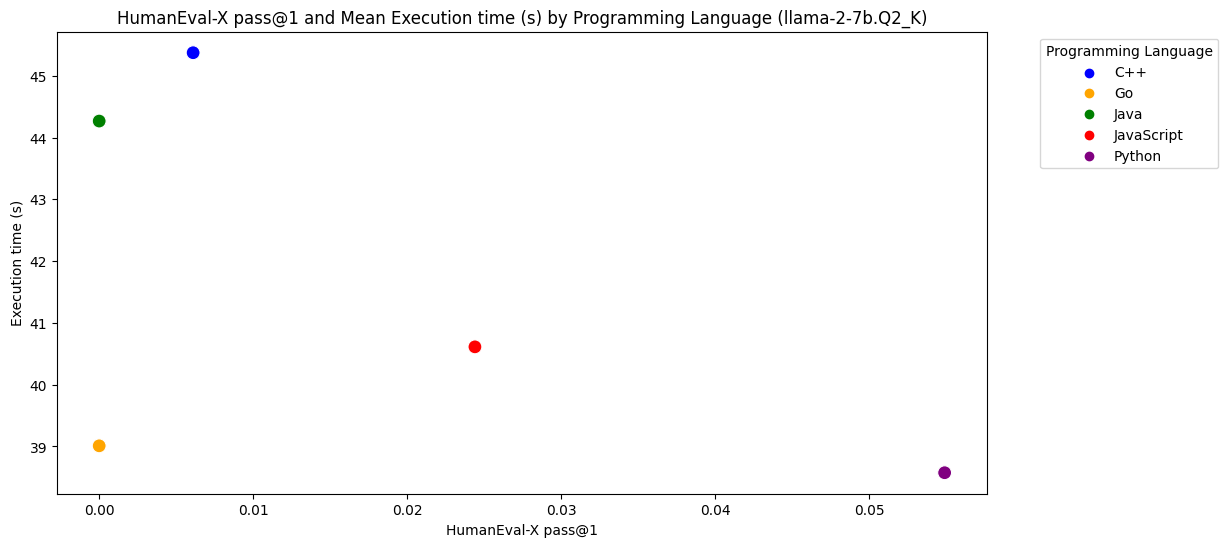

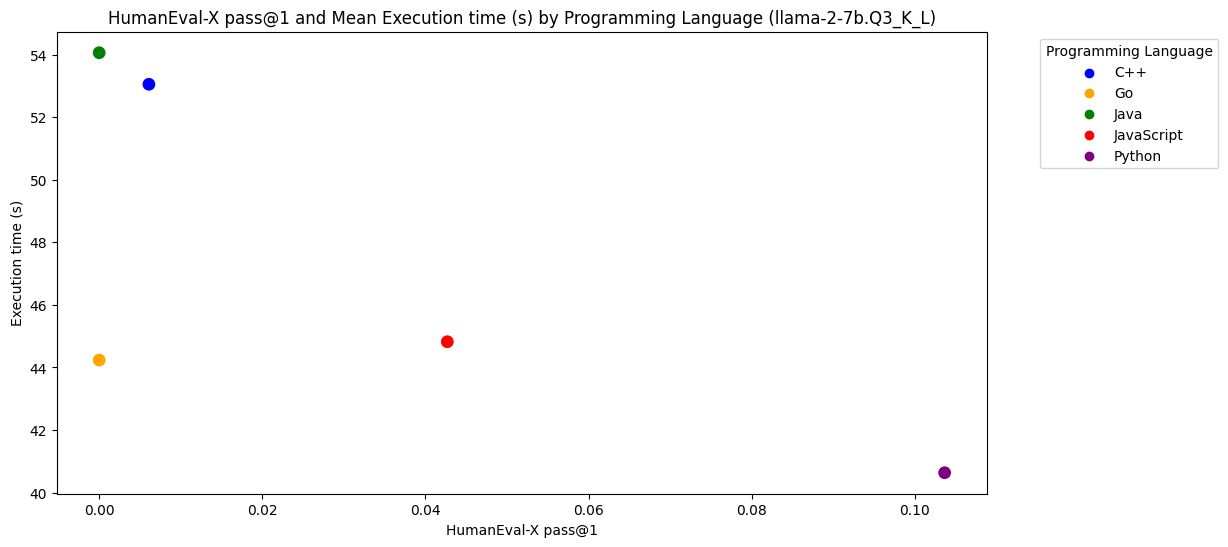

In [24]:
# Filter the DataFrame for the specific value in the "LLM" column
for model_name in ["llama-2-7b.Q2_K", "llama-2-7b.Q3_K_L"]:

    filtered_mean_values_df = mean_values_df[mean_values_df['LLM'] == model_name]
    
    # Create a scatter plot using seaborn
    plt.figure(figsize=(12, 6))
    scatter_plot = sns.scatterplot(x='HumanEval-X pass@1', y='Execution time (s)', hue='Programming Language', data=filtered_mean_values_df, palette=custom_palette, s=100)
    
    # Add labels and title
    plt.xlabel('HumanEval-X pass@1')
    plt.ylabel('Execution time (s)')
    plt.title(f'HumanEval-X pass@1 and Mean Execution time (s) by Programming Language ({model_name})')
    
    # Add legend
    scatter_plot.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()

### Scatterplot por Dataset

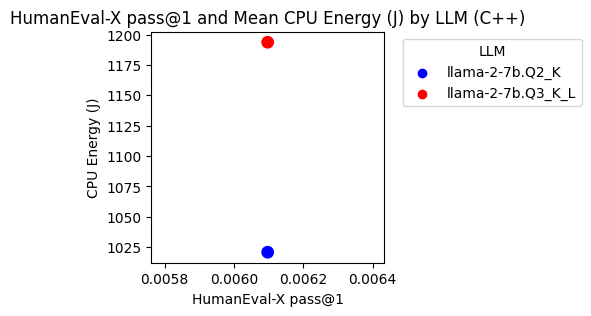

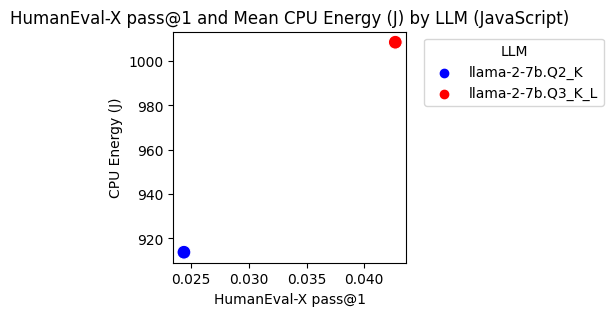

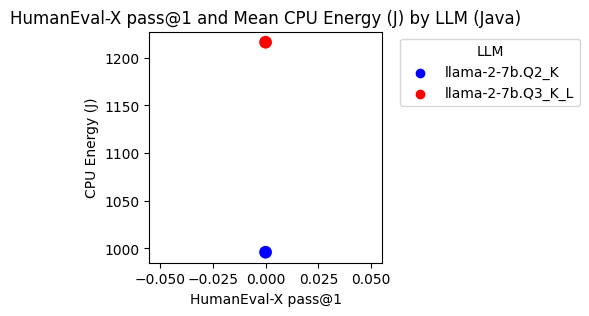

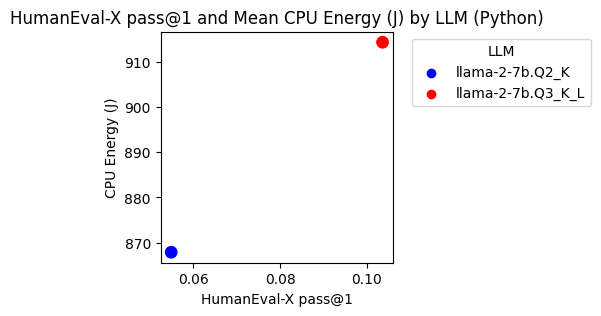

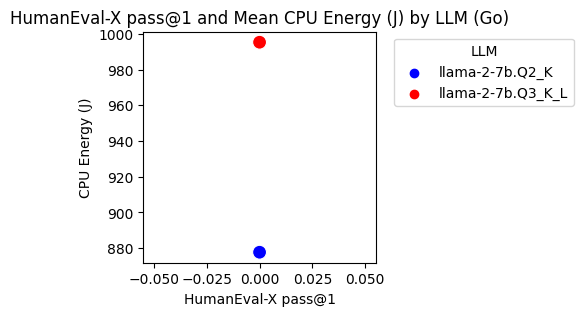

In [25]:
# Filter the DataFrame for the specific value in the "Programming Language" column
for programming_language in ["C++", "JavaScript", "Java", "Python", "Go"]:

    filtered_mean_values_df = mean_values_df[mean_values_df['Programming Language'] == programming_language]
    
    # Create a scatter plot using seaborn
    plt.figure(figsize=(3, 3))
    scatter_plot = sns.scatterplot(x='HumanEval-X pass@1', y='CPU Energy (J)', hue='LLM', data=filtered_mean_values_df, palette=custom_palette_llms, s=100)
    
    # Add labels and title
    plt.xlabel('HumanEval-X pass@1')
    plt.ylabel('CPU Energy (J)')
    plt.title(f'HumanEval-X pass@1 and Mean CPU Energy (J) by LLM ({programming_language})')
    
    # Add legend
    scatter_plot.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()